In [1]:
%matplotlib inline
import numpy as np
import healpy as hp

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Restore the data from
temp = np.load('month_o_clouds.npz')
cloud_maps = temp['cloud_maps'].copy()
mjds = temp['mjds'].copy()
map_key = temp['map_key'].copy()
temp.close()

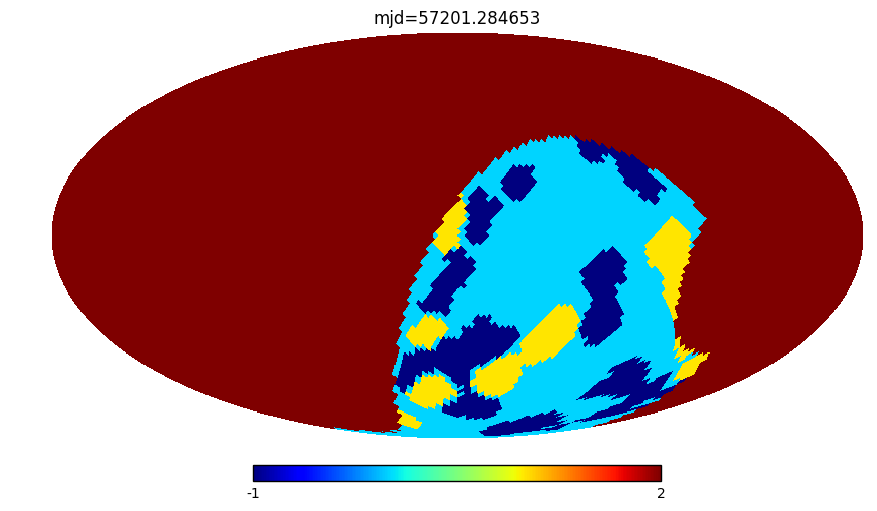

In [3]:
i = 1000
hp.mollview(cloud_maps[i,:], title='mjd=%f' % mjds[i])

In [4]:
map_key

array({'bright_in_current': -1, 'good': 0, 'bright_in_last': 1, 'masked': 2}, dtype=object)

The cloud_maps array holds a rough cloud map derived from all-sky camera images. Values of 2 are masked (either high airmass or close to the moon), values of 1 mean the pixel was brighter in the previous frame (so was cloudy, and could still be), and values of -1 mean the pixel is brighter in the current frame (probably cloudy). Values of 0 mean the pixel is about the same, so probably clear.  

In [6]:
# print out some raw data for 3 healpixels and 3 times.
healpixels = [1000,1001, 1002]
print 'MJD, hpID, mask_value'
for healpixel in healpixels:
    for i in range(3):
        print '%f, %i, %i' % (mjds[i], healpixel, cloud_maps[i,healpixel])

MJD, hpID, mask_value
57200.001875, 1000, 2
57200.002685, 1000, 2
57200.003507, 1000, 2
57200.001875, 1001, 2
57200.002685, 1001, 2
57200.003507, 1001, 2
57200.001875, 1002, 2
57200.002685, 1002, 2
57200.003507, 1002, 2


In [11]:
from lsst.sims.utils import _raDec2Hpid
field_data = np.loadtxt('fieldID.dat', delimiter='|', skiprows=1,
                        dtype=zip(['id', 'ra', 'dec'], [int, float, float]))
field_data['ra'] = np.radians(field_data['ra'])
field_data['dec'] = np.radians(field_data['dec'])

# Find the healpix ID for each field center
field_hp = _raDec2Hpid(32, field_data['ra'], field_data['dec'])

# Use the index to convert a cloud_map to be indexed by healpix id to field id
field_mask = cloud_maps[i,field_hp]
        

In [14]:
field_mask

array([0, 0, 0, ..., 2, 2, 2])